IMPORTING LIBRARY

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

READING THE DATA SET

In [4]:
df=pd.read_csv('loan2.csv')

DISPLAYING TOP 5 RECORDS

In [5]:
df.head()

,person_home_ownership,loan_intent,loan_grade,person_age,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income,person_emp_length,cb_person_default_on_file
0,RENT,PERSONAL,D,22,35000,16.02,1,0.59,3,59000,123,Y
1,OWN,EDUCATION,B,21,1000,11.14,0,0.10,2,9600,5,N
2,MORTGAGE,MEDICAL,C,25,5500,12.87,1,0.57,3,9600,1,N
3,RENT,MEDICAL,C,23,35000,15.23,1,0.53,2,65500,4,N
4,RENT,MEDICAL,C,24,35000,14.27,1,0.55,4,54400,8,Y


DESCRIBING THE COLUMNS IN DATA SET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_home_ownership       32581 non-null  object 
 1   loan_intent                 32581 non-null  object 
 2   loan_grade                  32581 non-null  object 
 3   person_age                  32581 non-null  int64  
 4   loan_amnt                   32581 non-null  int64  
 5   loan_int_rate               32581 non-null  float64
 6   loan_status                 32581 non-null  int64  
 7   loan_percent_income         32581 non-null  float64
 8   cb_person_cred_hist_length  32581 non-null  int64  
 9   person_income               32581 non-null  int64  
 10  person_emp_length           32581 non-null  int64  
 11  cb_person_default_on_file   32581 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 3.0+ MB


In [7]:
subset=df.loc[:,'loan_amnt':'cb_person_default_on_file']

In [8]:
df1=subset

In [9]:
df1

,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income,person_emp_length,cb_person_default_on_file
0,35000,16.02,1,0.59,3,59000,123,Y
1,1000,11.14,0,0.10,2,9600,5,N
2,5500,12.87,1,0.57,3,9600,1,N
3,35000,15.23,1,0.53,2,65500,4,N
4,35000,14.27,1,0.55,4,54400,8,Y
...,...,...,...,...,...,...,...,...
32576,5800,13.16,0,0.11,30,53000,1,N
32577,17625,7.49,0,0.15,19,120000,4,N
32578,35000,10.99,1,0.46,28,76000,3,N
32579,15000,11.48,0,0.10,26,150000,5,N


SPLITING DATA SETS AS X AND Y(TARGET)

In [10]:
x=df1.iloc[:,:7]

In [11]:
x


,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income,person_emp_length
0,35000,16.02,1,0.59,3,59000,123
1,1000,11.14,0,0.10,2,9600,5
2,5500,12.87,1,0.57,3,9600,1
3,35000,15.23,1,0.53,2,65500,4
4,35000,14.27,1,0.55,4,54400,8
...,...,...,...,...,...,...,...
32576,5800,13.16,0,0.11,30,53000,1
32577,17625,7.49,0,0.15,19,120000,4
32578,35000,10.99,1,0.46,28,76000,3
32579,15000,11.48,0,0.10,26,150000,5


In [12]:
y=df1.iloc[:,7:].values

In [13]:
y

array([['Y'],
       ['N'],
       ['N'],
       ...,
       ['N'],
       ['N'],
       ['N']], dtype=object)

SPLITTING DATA AS TRAINING AND TESTING DATA

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y.ravel(),test_size=0.2,random_state=0)

In [16]:

x_train

,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income,person_emp_length
2162,5000,10.71,0,0.17,2,30000,4
7670,1200,13.11,0,0.02,3,54000,8
24007,10000,12.69,1,0.34,10,29000,2
25230,25000,21.27,1,0.33,6,75840,5
4897,5000,6.99,0,0.13,2,39000,4
...,...,...,...,...,...,...,...
13123,24000,0.00,0,0.27,2,88494,8
19648,4000,13.61,0,0.11,5,35000,11
9845,9000,10.83,0,0.23,2,38500,1
10799,10000,0.00,0,0.24,2,42000,4


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st=StandardScaler()

In [19]:
x_train=st.fit_transform(x_train)

In [20]:
x_test=st.fit_transform(x_test)

In [21]:
x_train


array([[-0.72801377,  0.17310984, -0.53321711, ..., -0.93998538,
        -0.55188661, -0.16208507],
       [-1.3299034 ,  0.708681  , -0.53321711, ..., -0.69242535,
        -0.18720293,  0.7925156 ],
       [ 0.06394628,  0.61495605,  1.87540868, ...,  1.04049491,
        -0.56708176, -0.63938541],
       ...,
       [-0.09444573,  0.1998884 , -0.53321711, ..., -0.93998538,
        -0.4227278 , -0.87803558],
       [ 0.06394628, -2.21687647, -0.53321711, ..., -0.93998538,
        -0.36954477, -0.16208507],
       [ 0.21441869, -0.59007906, -0.53321711, ..., -0.93998538,
        -0.49110599,  0.55386543]])

In [22]:
y_train

array(['N', 'Y', 'N', ..., 'N', 'N', 'N'], dtype=object)

K NEAREST NEIGHBOR CLASSIFIER ALGORITHM IMPLEMENTATION

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


CALCULATING ERROR FOR K VALUE BETWEEN 1 AND 40

In [24]:
error=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error.append(np.mean(pred_i!=y_test))




In [25]:
import matplotlib.pyplot as plt

PLOTTING THE GRAPH FOR MEAN ERROR AND CORRESPONDING K VALUE

Minimum error  0.16464630965168023 at k=  14


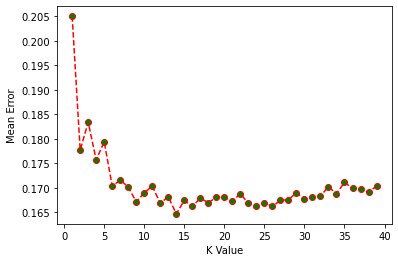

In [27]:
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='green')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error ",min(error),"at k= ",error.index(min(error))+1)

In [28]:
error

[0.2050023016725487,
 0.1776891207610864,
 0.1833665797145926,
 0.17569433788553016,
 0.17937701396348013,
 0.17032376860518644,
 0.17155132729783643,
 0.1701703237686052,
 0.1671014270369802,
 0.16894276507595518,
 0.17032376860518644,
 0.16679453736381772,
 0.16817554089304895,
 0.16464630965168023,
 0.1674083167101427,
 0.1661807580174927,
 0.16786865121988645,
 0.16694798220039897,
 0.1680220960564677,
 0.1680220960564677,
 0.16725487187356144,
 0.16878932023937396,
 0.16679453736381772,
 0.16633420285407396,
 0.16694798220039897,
 0.1661807580174927,
 0.1674083167101427,
 0.16756176154672395,
 0.16894276507595518,
 0.1677152063833052,
 0.1680220960564677,
 0.1683289857296302,
 0.1701703237686052,
 0.16878932023937396,
 0.17109099278809267,
 0.1698634340954427,
 0.16970998925886144,
 0.16909620991253643,
 0.17032376860518644]

In [29]:
classifier=KNeighborsClassifier(n_neighbors=14)

In [30]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

PREDICTING THE VALUE Y FOR TESTING DATA SET

In [31]:
y_pred=classifier.predict(x_test)

In [32]:
y_pred


array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

DISPLAYING CONFUSION MATRIX

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,y_pred)


array([[5158,  243],
       [ 830,  286]], dtype=int64)

In [35]:
from sklearn import metrics

FINDIG THE ACCURACY FOR THE KNN ALGORITHM

In [38]:
print("\nAccuracy Of KNNF For The Given Dataset : ",metrics.accuracy_score(y_test,y_pred))


Accuracy Of KNNF For The Given Dataset :  0.8353536903483197
